In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import G, c
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u


In [1]:
pip install notebook-as-pdf

     ---------------------------------------- 0.0/50.1 kB ? eta -:--:--
     -------- ------------------------------- 10.2/50.1 kB ? eta -:--:--
     -------------------------------------- 50.1/50.1 kB 847.8 kB/s eta 0:00:00
     ---------------------------------------- 0.0/84.9 kB ? eta -:--:--
     ---------------------------------------- 84.9/84.9 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/232.6 kB ? eta -:--:--
   ------------------- -------------------- 112.6/232.6 kB 2.2 MB/s eta 0:00:01
   -------------------------------------- - 225.3/232.6 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 232.6/232.6 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/82.9 kB ? eta -:--:--
   ---------------------------------------- 82.9/82.9 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/144.2 kB ? eta

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.32.0 requires packaging<24,>=16.8, but you have packaging 24.1 which is incompatible.


In [207]:
df = pd.read_csv("C:/Users/HP/Downloads/Skyserver_SQL6_19_2025 7_27_32 AM.csv", header=1)
print(df.columns.tolist())


['objid', 'ra', 'dec', 'specz', 'proj_sep']


In [209]:

averaged_df = df.groupby('objid').agg({
    'specz': 'mean',
    'ra': 'first',
    'dec': 'first',
    'proj_sep': 'first'
}).reset_index()


count    17.000000
mean      0.080659
std       0.018640
min       0.040462
25%       0.072223
50%       0.082701
75%       0.094870
max       0.097160
Name: specz, dtype: float64


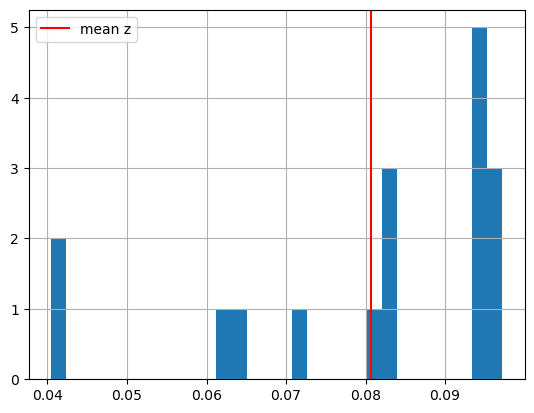

In [211]:
print(averaged_df['specz'].describe())
plt.hist(averaged_df['specz'], bins=30)
plt.axvline(averaged_df['specz'].mean(), color='red', label='mean z')
plt.grid()
plt.legend()
plt.show()

In [213]:
filtered_df = averaged_df[averaged_df['specz'].between(z_peak - 0.03, z_peak + 0.03)]
print(f"Cluster redshift ~{z_peak:.3f}, filtered members = {len(filtered_df)}")

total_galaxies = len(df)
cluster_fraction = len(filtered_df) / total_galaxies
print(f"{cluster_fraction:.2%} of galaxies are cluster members")


luminous_mass = 200 * 1e12
print(f"Luminous mass estimate: {luminous_mass:.2e} solar masses")



Cluster redshift ~0.094, filtered members = 14
58.33% of galaxies are cluster members
Luminous mass estimate: 2.00e+14 solar masses


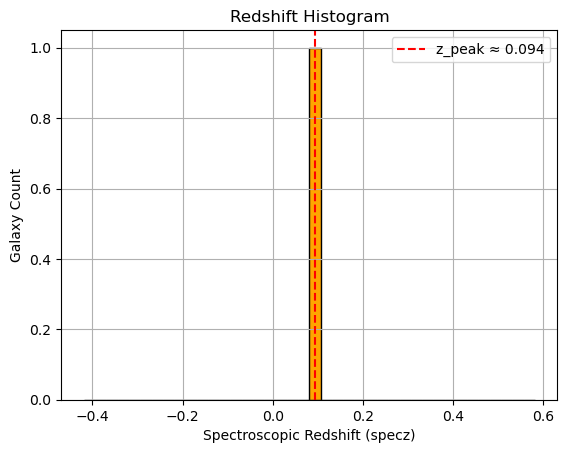

In [215]:
plt.hist(z_values, bins=40, color='orange', edgecolor='black')
plt.axvline(z_peak, color='red', linestyle='--', label=f'z_peak ≈ {z_peak:.3f}')
plt.xlabel("Spectroscopic Redshift (specz)")
plt.ylabel("Galaxy Count")
plt.title("Redshift Histogram")
plt.grid()
plt.legend()
plt.show()



In [225]:
from astropy.constants import c

z = filtered_df['specz']
z_cluster = z.mean()
c_val = c.to('m/s').value

velocities = c_val * ((1 + z)**2 - (1 + z_cluster)**2) / ((1 + z)**2 + (1 + z_cluster)**2)


filtered_df.loc[:, 'velocity'] = velocities

disp = filtered_df['velocity'].std()

print(f"Velocity Dispersion: {disp:.2f} m/s")



Velocity Dispersion: 2845733.82 m/s


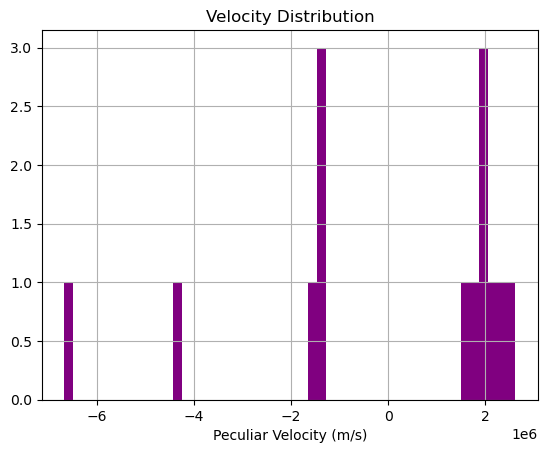

In [227]:
plt.hist(filtered_df['velocity'], bins=50, color='purple')
plt.xlabel("Peculiar Velocity (m/s)")
plt.title("Velocity Distribution")
plt.grid()
plt.show()


In [229]:
from astropy import units as u

q0 = -0.534
H_0 = 70 * (u.km / u.s / u.Mpc)


r = (c_val * z_cluster / H_0.value) * (1 - z_cluster * (1 + q0) / 2)
ra = r / (1 + z_cluster)


angular_radius_arcmin = filtered_df['proj_sep'].max()
angular_radius_rad = np.deg2rad(angular_radius_arcmin / 60)

diameter = 2 * ra * angular_radius_rad
print(f"Estimated Cluster Diameter: {diameter:.2f} Mpc")


Estimated Cluster Diameter: 2745.68 Mpc


In [231]:
from astropy.constants import G

R_meters = (diameter / 2) * 1e6 * 3.086e16
G_val = G.to('m**3 / (kg * s**2)').value
M_dyn = 3 * (disp**2) * R_meters / G_val

M_sun = 1.989e30
M_dyn_solar = M_dyn / M_sun

print(f"Estimated Dynamical Mass: {M_dyn_solar:.2e} solar masses")


Estimated Dynamical Mass: 7.75e+18 solar masses


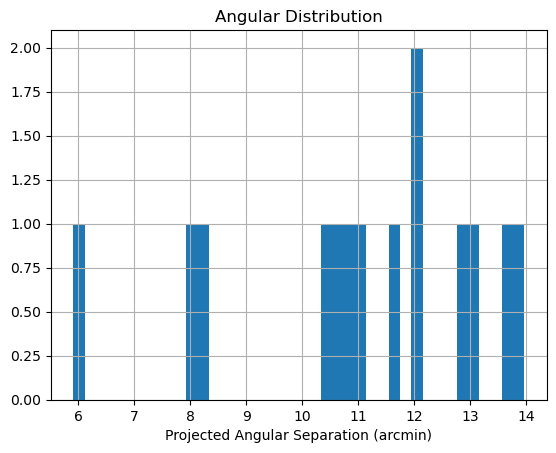

In [233]:
plt.hist(filtered_df['proj_sep'], bins=40)
plt.xlabel("Projected Angular Separation (arcmin)")
plt.title("Angular Distribution")
plt.grid()
plt.show()
